<a href="https://colab.research.google.com/github/BiswaranjanKar12/BiswaranjanKar12/blob/main/DLWP_Major_Assignment_3_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

IMPORTING THE DATASET

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip -d ./dataset

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: ./dataset/raw-img/ragno/OIP-MhRGx7d8

In [ ]:
import os
os.listdir('./dataset/raw-img')

['scoiattolo',
 'mucca',
 'ragno',
 'pecora',
 'gallina',
 'farfalla',
 'cane',
 'gatto',
 'cavallo',
 'elefante']

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

DATASET DIRECTORY

In [ ]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina','gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
dataset_dir = './dataset/raw-img'
dir = dataset_dir

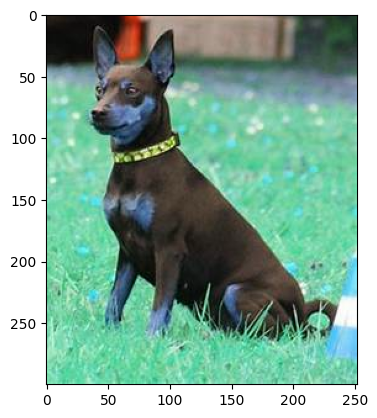

In [ ]:
for cl in classes:
    path = os.path.join(dir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [ ]:
img.shape

(300, 252, 3)

In [ ]:
dataset = []
max_images_per_class = 1200  # Change this number based on memory limits

for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(dataset_dir, cl)
    for i, img_name in enumerate(os.listdir(path)):
        if i >= max_images_per_class:
            break
        try:
            img = cv2.imread(os.path.join(path, img_name))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
        except:
            continue


In [ ]:
len(dataset)

12000

In [ ]:
import random
import numpy as np

random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

farfalla
pecora
pecora
gatto
pecora
pecora
scoiattolo
gallina
farfalla
cane


In [ ]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)
x = np.array(x)
y = np.array(y)
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (12000, 224, 224, 3)
<class 'numpy.ndarray'> (12000,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9600, 224, 224, 3) (2400, 224, 224, 3) (9600,) (2400,)


In [ ]:
translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [ ]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(translate[label[index]], fontsize=10)

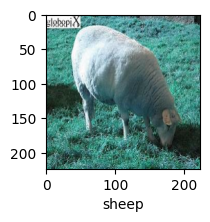

In [ ]:
img_show(x_test, y_test, 8)

In [ ]:
IMAGE_SHAPE = [224, 224]

In [ ]:
vgg = VGG16(input_shape= IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = predictions)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.7639 - loss: 10.2474
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 70s 152ms/step - accuracy: 0.9555 - loss: 1.9520
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - accuracy: 0.9750 - loss: 0.9736
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9852 - loss: 0.4812
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9848 - loss: 0.5389


In [ ]:
model.evaluate(x_test, y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.9042 - loss: 9.9952


[8.60265827178955, 0.9129166603088379]

75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step


9


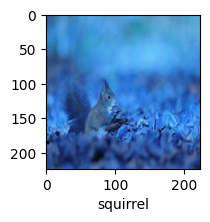

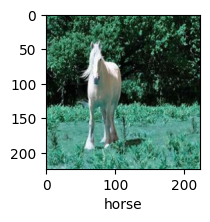

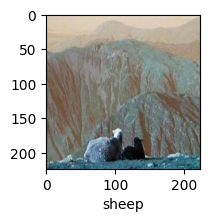

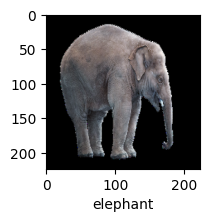

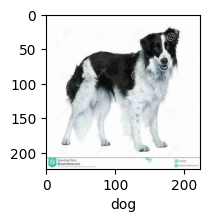

In [ ]:
p = model.predict(x_test)
print(np.argmax(p[0]))
translate[np.argmax(p[0])]
for i in range(5):
    img_show(x_test, y_test, i)

model.save('animal-10.hdf5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'butterfly'

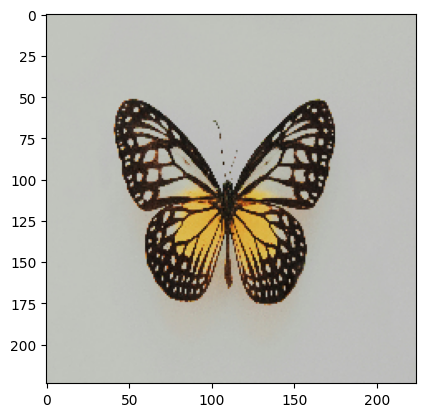

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img1 = image.load_img('/content/drive/MyDrive/AI Hack/eval1.jpg', target_size= (224, 224))
plt.imshow(img1)
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
model = load_model('/content/animal-10.hdf5')
result_b = model.predict(img1)
translate[np.argmax(result_b[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


'dog'

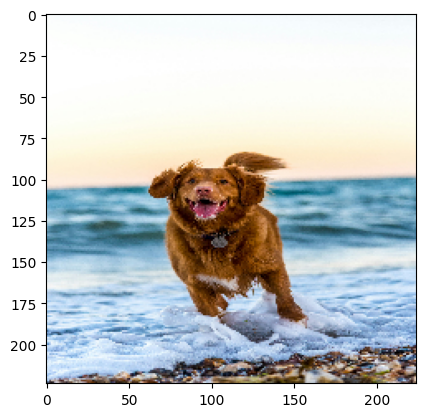

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img2 = image.load_img('/content/drive/MyDrive/AI Hack/eval2.jpg', target_size= (224, 224))
plt.imshow(img2)
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
model = load_model('/content/animal-10.hdf5')
result_d = model.predict(img2)
translate[np.argmax(result_d[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


'elephant'

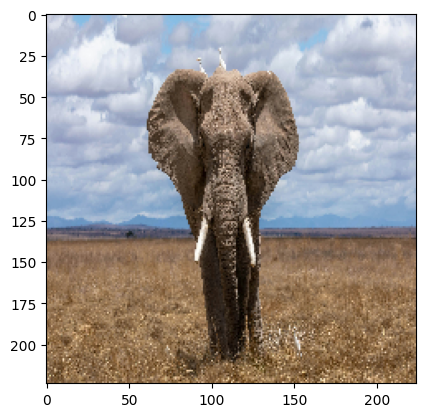

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img3 = image.load_img('/content/drive/MyDrive/AI Hack/eval3.jpg', target_size= (224, 224))
plt.imshow(img3)
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
model = load_model('/content/animal-10.hdf5')
result_e = model.predict(img3)
translate[np.argmax(result_e[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


'squirrel'

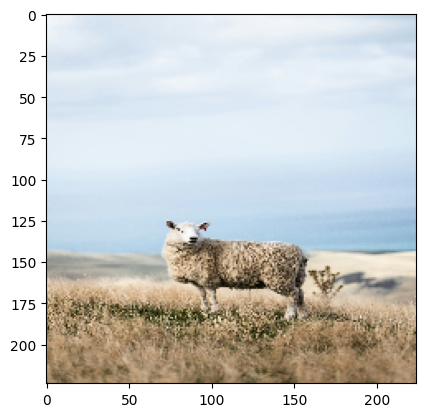

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img4 = image.load_img('/content/drive/MyDrive/AI Hack/eval4.jpg', target_size= (224, 224))
plt.imshow(img4)
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
model = load_model('/content/animal-10.hdf5')
result_s = model.predict(img4)
translate[np.argmax(result_s[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


'squirrel'

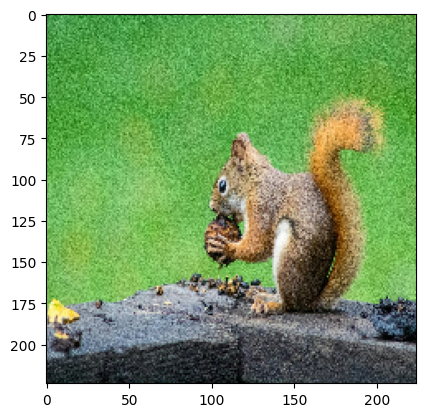

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img5 = image.load_img('/content/drive/MyDrive/AI Hack/eval5.jpg', target_size= (224, 224))
plt.imshow(img5)
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sq = model.predict(img5)
translate[np.argmax(result_sq[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


'spider'

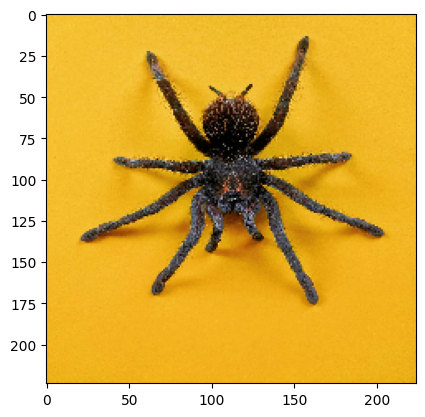

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval6.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


'sheep'

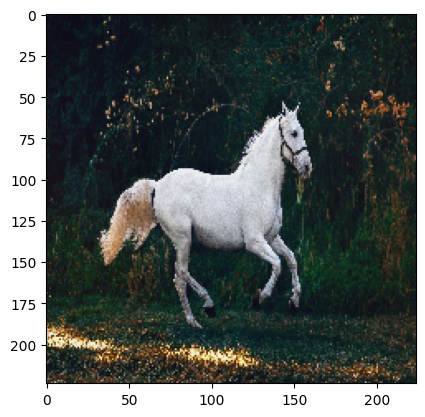

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval7.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


'chicken'

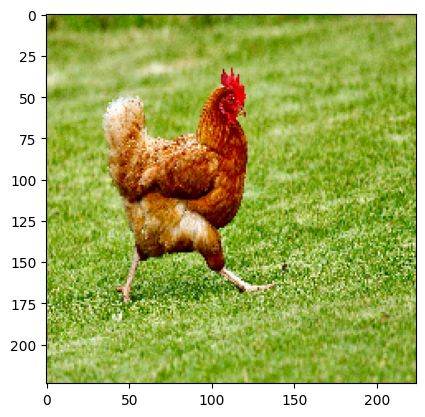

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval8.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


'cow'

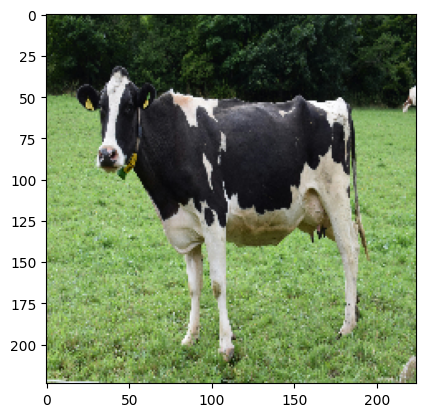

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval9.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


'cat'

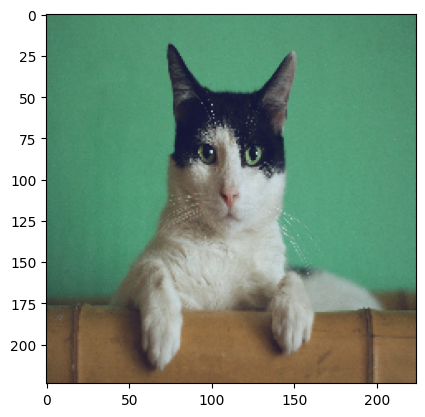

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval10.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

In [ ]:
from tensorflow.keras.models import load_model

# Load model
vgg_model = load_model('animal-10.hdf5')

# Evaluate
vgg_accuracy, vgg_inference_time = evaluate_model(vgg_model, x_test, y_test)

print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")
print(f"Average Inference Time: {vgg_inference_time:.6f} seconds/image")


75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step
VGG16 Accuracy: 0.9129
Average Inference Time: 0.008827 seconds/image


In [60]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Build VGG model
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
output = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=base_model.input, outputs=output)
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# ⬅️ Save history during training
history_vgg = vgg_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save model after training
vgg_model.save('animal-10.hdf5')


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 63s 197ms/step - accuracy: 0.7647 - loss: 10.7056 - val_accuracy: 0.8975 - val_loss: 6.3029
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 228ms/step - accuracy: 0.9567 - loss: 1.8793 - val_accuracy: 0.8979 - val_loss: 6.2268
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 228ms/step - accuracy: 0.9747 - loss: 1.0932 - val_accuracy: 0.9083 - val_loss: 7.4521
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 228ms/step - accuracy: 0.9797 - loss: 0.9843 - val_accuracy: 0.9175 - val_loss: 7.8586
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 228ms/step - accuracy: 0.9856 - loss: 0.6016 - val_accuracy: 0.9021 - val_loss: 9.5335


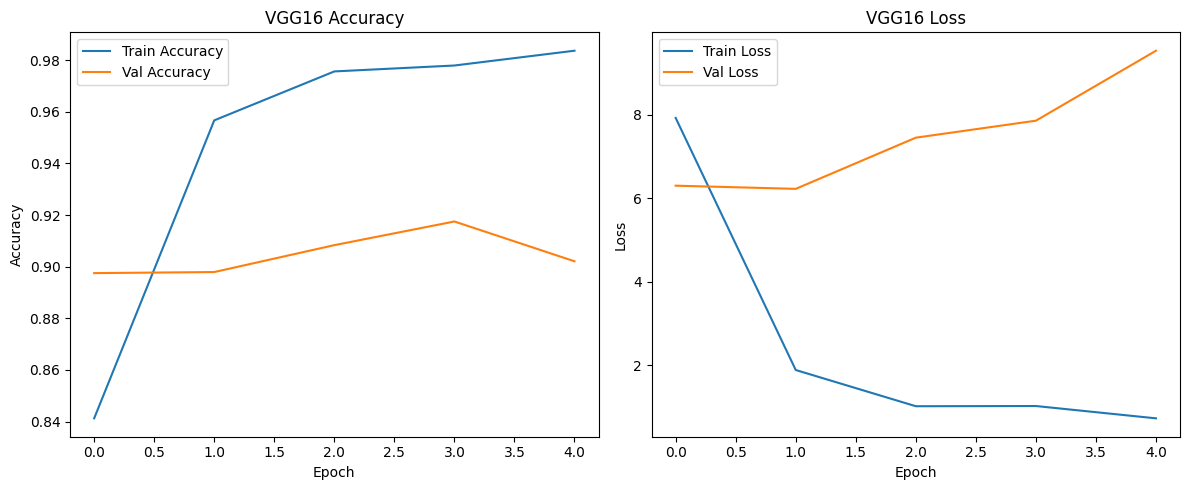

In [61]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call for VGG16
plot_history(history_vgg, "VGG16")


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define ZFNet architecture
def build_zfnet(input_shape=(224, 224, 3), num_classes=10):
    model = Sequential()
    model.add(Conv2D(96, (7,7), strides=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Compile and train ZFNet
zfnet_model = build_zfnet()
zfnet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Store training history
history_zfnet = zfnet_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save model
zfnet_model.save('zfnet-animal10.hdf5')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 150ms/step - accuracy: 0.0965 - loss: 51.7300 - val_accuracy: 0.0887 - val_loss: 2.3035
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.0945 - loss: 2.3044 - val_accuracy: 0.0975 - val_loss: 2.3031
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.0938 - loss: 2.3040 - val_accuracy: 0.0887 - val_loss: 2.3038
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 144ms/step - accuracy: 0.1042 - loss: 2.3031 - val_accuracy: 0.1013 - val_loss: 2.3030
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.0887 - val_loss: 2.3035


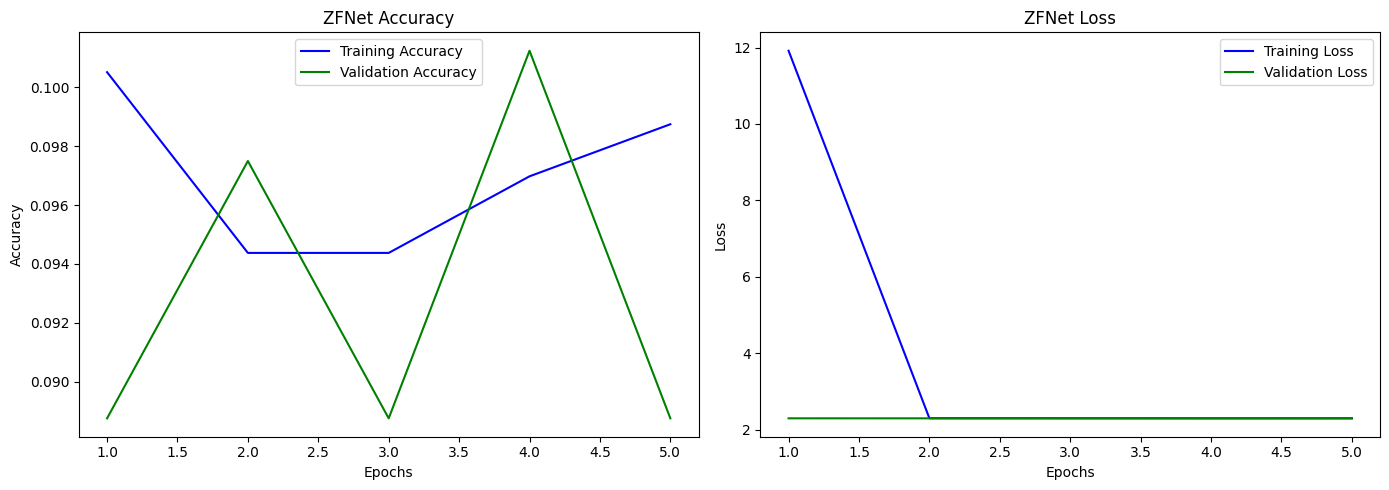

In [64]:
import matplotlib.pyplot as plt

def plot_history(history, model_name="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example call for ZFNet:
plot_history(history_zfnet, "ZFNet")


In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def inception_module(x, f1, f3_r, f3, f5_r, f5, pool_proj):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    conv3 = Conv2D(f3_r, (1,1), padding='same', activation='relu')(x)
    conv3 = Conv2D(f3, (3,3), padding='same', activation='relu')(conv3)

    conv5 = Conv2D(f5_r, (1,1), padding='same', activation='relu')(x)
    conv5 = Conv2D(f5, (5,5), padding='same', activation='relu')(conv5)

    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool = Conv2D(pool_proj, (1,1), padding='same', activation='relu')(pool)

    return concatenate([conv1, conv3, conv5, pool], axis=3)

def build_googlenet(input_shape=(224, 224, 3), num_classes=10):
    input_layer = Input(shape=input_shape)

    x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = Conv2D(64, (1,1), activation='relu')(x)
    x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    x = AveragePooling2D(pool_size=(7,7), strides=(1,1))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    return model


In [66]:
googlenet_model = build_googlenet()
googlenet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_googlenet = googlenet_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

googlenet_model.save('googlenet-animal10.hdf5')


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 135ms/step - accuracy: 0.1112 - loss: 2.4164 - val_accuracy: 0.1000 - val_loss: 2.3080
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.1017 - loss: 2.3041 - val_accuracy: 0.0992 - val_loss: 2.3052
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.1008 - loss: 2.3032 - val_accuracy: 0.0975 - val_loss: 2.3032
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0958 - loss: 2.3032 - val_accuracy: 0.0992 - val_loss: 2.3028
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0993 - loss: 2.3032 - val_accuracy: 0.0887 - val_loss: 2.3033


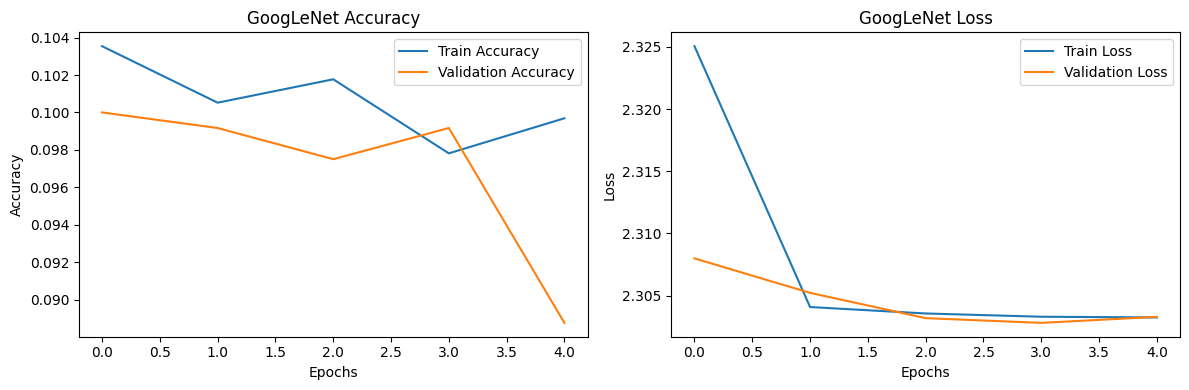

In [67]:
import matplotlib.pyplot as plt

def plot_history(history, model_name="Model"):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Now call the function with GoogLeNet's history
plot_history(history_googlenet, "GoogLeNet")


In [68]:
import time
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def evaluate_model(model, x_test, y_test, model_name="Model"):
    start_time = time.time()
    predictions = model.predict(x_test)
    inference_time = time.time() - start_time

    pred_labels = np.argmax(predictions, axis=1)
    acc = accuracy_score(y_test, pred_labels)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Inference Time (total): {inference_time:.4f} seconds")
    print(f"Inference Time per image: {inference_time / len(x_test):.6f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, pred_labels, target_names=translate))

    return acc, inference_time


In [69]:
vgg_model = load_model('animal-10.hdf5')
vgg_acc, vgg_time = evaluate_model(vgg_model, x_test, y_test, model_name="VGG16")


75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step

--- VGG16 Evaluation ---
Test Accuracy: 0.9021
Inference Time (total): 13.3591 seconds
Inference Time per image: 0.005566 seconds

Classification Report:
              precision    recall  f1-score   support

         dog       0.87      0.86      0.87       243
       horse       0.72      0.97      0.82       234
    elephant       0.95      0.96      0.96       241
   butterfly       0.96      0.95      0.96       263
     chicken       0.98      0.92      0.95       240
         cat       0.90      0.93      0.91       240
         cow       0.96      0.68      0.80       249
       sheep       0.86      0.91      0.88       238
      spider       0.94      0.95      0.94       239
    squirrel       0.97      0.92      0.94       213

    accuracy                           0.90      2400
   macro avg       0.91      0.90      0.90      2400
weighted avg       0.91      0.90      0.90      2400



In [71]:
zf_model = load_model('zfnet-animal10.hdf5')
zfnet_acc, zfnet_time = evaluate_model(zf_model, x_test, y_test, model_name="ZFNet")


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step

--- ZFNet Evaluation ---
Test Accuracy: 0.0887
Inference Time (total): 9.6228 seconds
Inference Time per image: 0.004009 seconds

Classification Report:
              precision    recall  f1-score   support

         dog       0.00      0.00      0.00       243
       horse       0.00      0.00      0.00       234
    elephant       0.00      0.00      0.00       241
   butterfly       0.00      0.00      0.00       263
     chicken       0.00      0.00      0.00       240
         cat       0.00      0.00      0.00       240
         cow       0.00      0.00      0.00       249
       sheep       0.00      0.00      0.00       238
      spider       0.00      0.00      0.00       239
    squirrel       0.09      1.00      0.16       213

    accuracy                           0.09      2400
   macro avg       0.01      0.10      0.02      2400
weighted avg       0.01      0.09      0.01      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
googlenet_model = load_model('googlenet-animal10.hdf5')
googlenet_acc, googlenet_time = evaluate_model(googlenet_model, x_test, y_test, model_name="GoogLeNet")


75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step

--- GoogLeNet Evaluation ---
Test Accuracy: 0.0887
Inference Time (total): 12.3018 seconds
Inference Time per image: 0.005126 seconds

Classification Report:
              precision    recall  f1-score   support

         dog       0.00      0.00      0.00       243
       horse       0.00      0.00      0.00       234
    elephant       0.00      0.00      0.00       241
   butterfly       0.00      0.00      0.00       263
     chicken       0.00      0.00      0.00       240
         cat       0.00      0.00      0.00       240
         cow       0.00      0.00      0.00       249
       sheep       0.00      0.00      0.00       238
      spider       0.00      0.00      0.00       239
    squirrel       0.09      1.00      0.16       213

    accuracy                           0.09      2400
   macro avg       0.01      0.10      0.02      2400
weighted avg       0.01      0.09      0.01      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


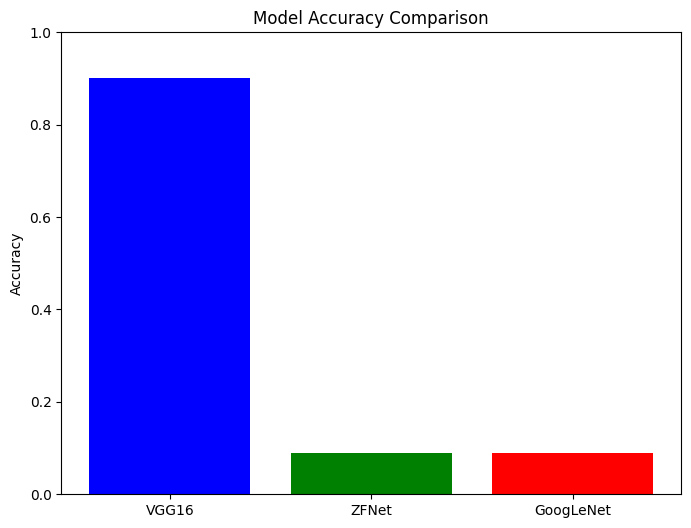

In [73]:
models = ['VGG16', 'ZFNet', 'GoogLeNet']
accuracies = [vgg_acc, zfnet_acc, googlenet_acc]

plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
